In [8]:
import pandas as pd
import numpy as np
df = pd.read_excel("C:\\Users\\vines\\Downloads\\Copy of myexcel.xlsx") 
df['Height'] = np.random.randint(150, 181, size=len(df))
df.to_excel('modified_file.xlsx', index=False, engine='openpyxl')
print("Height column updated and file saved ")

Height column updated and file saved 


In [10]:
print(df.head())


            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25     171     180   
1    Jae Crowder  Boston Celtics      99       SF   25     171     235   
2   John Holland  Boston Celtics      30       SG   27     162     205   
3    R.J. Hunter  Boston Celtics      28       SG   22     169     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29     163     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [14]:

team_counts = df['Team'].value_counts()

total_employees = len(df)

percentage_split = (team_counts / total_employees) * 100

distribution = pd.DataFrame({
    'team_count': team_counts,
    'percentage_split': percentage_split
})

print(distribution)
distribution.to_excel('team_distribution.xlsx', engine='openpyxl', index=True)

print(distribution.head())


                        team_count  percentage_split
Team                                                
New Orleans Pelicans            19          4.148472
Memphis Grizzlies               18          3.930131
Utah Jazz                       16          3.493450
New York Knicks                 16          3.493450
Milwaukee Bucks                 16          3.493450
Brooklyn Nets                   15          3.275109
Portland Trail Blazers          15          3.275109
Oklahoma City Thunder           15          3.275109
Denver Nuggets                  15          3.275109
Washington Wizards              15          3.275109
Miami Heat                      15          3.275109
Charlotte Hornets               15          3.275109
Atlanta Hawks                   15          3.275109
San Antonio Spurs               15          3.275109
Houston Rockets                 15          3.275109
Boston Celtics                  15          3.275109
Indiana Pacers                  15          3.

In [18]:
print(df.head())

            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25     171     180   
1    Jae Crowder  Boston Celtics      99       SF   25     171     235   
2   John Holland  Boston Celtics      30       SG   27     162     205   
3    R.J. Hunter  Boston Celtics      28       SG   22     169     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29     163     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [20]:
position_counts = df['Position'].value_counts()
total_employees = len(df)
percentage_split = (position_counts / total_employees) * 100
position_distribution = pd.DataFrame({
    'employee_count': position_counts,
    'percentage_split': percentage_split
})
print(position_distribution)
position_distribution.to_excel('employee_position_distribution.xlsx', engine='openpyxl', index=True)
print(position_distribution.head())


          employee_count  percentage_split
Position                                  
SG                   102         22.270742
PF                   100         21.834061
PG                    92         20.087336
SF                    85         18.558952
C                     79         17.248908
          employee_count  percentage_split
Position                                  
SG                   102         22.270742
PF                   100         21.834061
PG                    92         20.087336
SF                    85         18.558952
C                     79         17.248908


In [22]:
bins = [0, 20, 30, 40, 50, 60, 100] 
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']  

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_counts = df['age_group'].value_counts()

predominant_age_group = age_group_counts.idxmax()

percentage = (age_group_counts[predominant_age_group] / len(df)) * 100


print(f"Predominant Age Group: {predominant_age_group}")
print(f"Percentage of Employees in Predominant Age Group: {percentage:.2f}%")
print(age_group_counts)


Predominant Age Group: 21-30
Percentage of Employees in Predominant Age Group: 72.93%
age_group
21-30    334
31-40    119
41-50      3
0-20       2
51-60      0
60+        0
Name: count, dtype: int64


In [26]:
team_salary_expenditure = df.groupby('Team')['Salary'].sum()

highest_salary_team = team_salary_expenditure.idxmax()
highest_salary_team_value = team_salary_expenditure.max()

position_salary_expenditure = df.groupby('Position')['Salary'].sum()

highest_salary_position = position_salary_expenditure.idxmax()
highest_salary_position_value = position_salary_expenditure.max()

print(f"The team with the highest salary expenditure is: {highest_salary_team} with a total salary of {highest_salary_team_value:.2f}")
print(f"The position with the highest salary expenditure is: {highest_salary_position} with a total salary of {highest_salary_position_value:.2f}")

The team with the highest salary expenditure is: Cleveland Cavaliers with a total salary of 106988689.00
The position with the highest salary expenditure is: C with a total salary of 466377332.00


Correlation between Age and Salary: 0.21


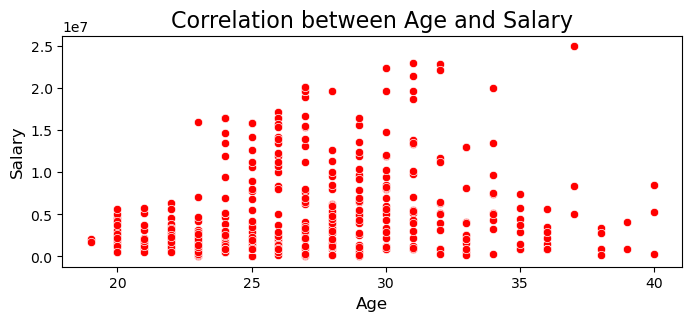

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df['Age'].corr(df['Salary'])
print(f"Correlation between Age and Salary: {correlation:.2f}")
plt.figure(figsize=(8, 3))
sns.scatterplot(data=df, x='Age', y='Salary', color='red')
plt.title('Correlation between Age and Salary', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

ValueError: could not convert string to float: 'Avery Bradley'

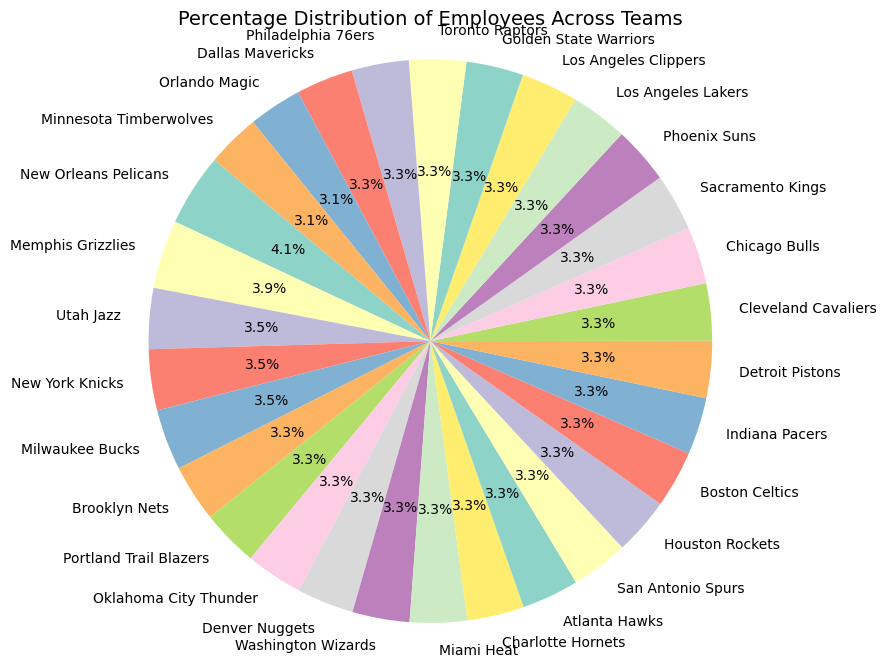

In [60]:

plt.figure(figsize=(8, 8))
plt.pie(distribution['percentage_split'], labels=distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", len(distribution)))
plt.title('Percentage Distribution_Employees Across Teams', fontsize=14)
plt.axis('equal') 
plt.show()

Text(0.5, 1.0, 'Employee Position Distribution: Number of Employees and Percentage Split')

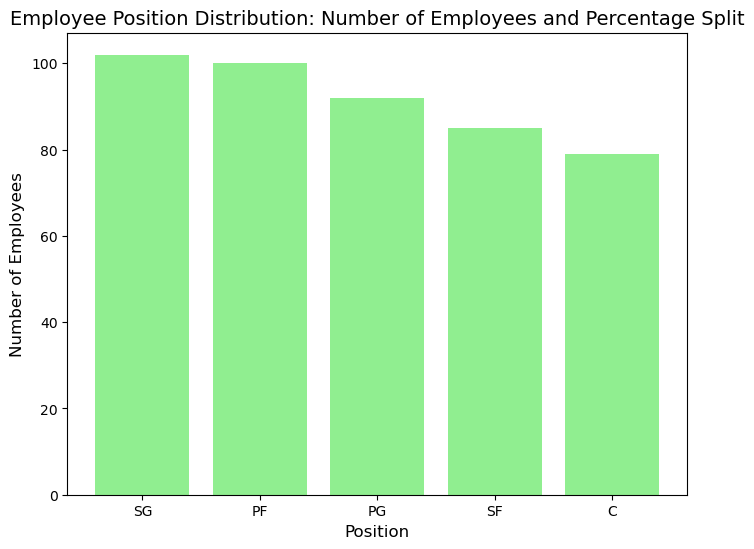

In [67]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(position_distribution.index, position_distribution['employee_count'], color='lightgreen', label='Employee Count')
ax1.set_xlabel('Position', fontsize=12)
ax1.set_ylabel('Number of Employees', fontsize=12)
ax1.set_title('Employee Position Distribution: Number of Employees and Percentage Split', fontsize=14)

C:\Users\vines\AppData\Local\Temp\ipykernel_15412\1084522577.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Set2')


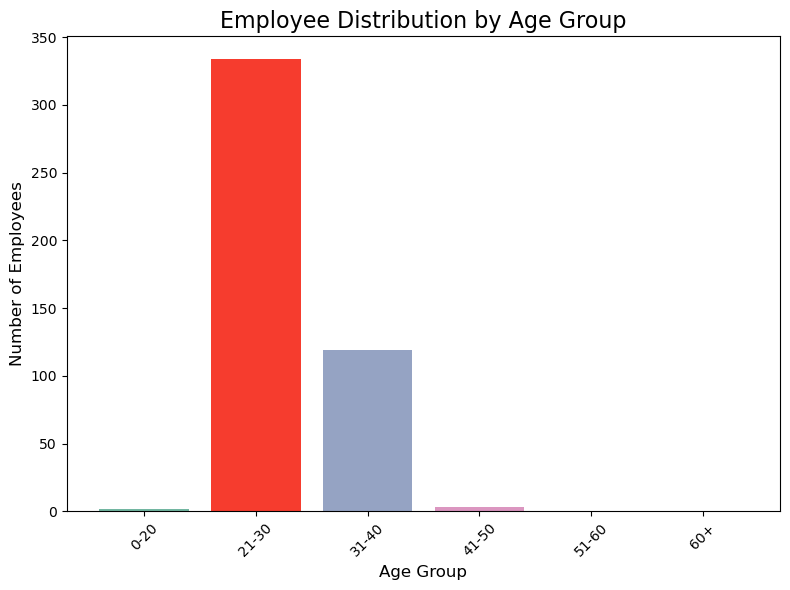

In [71]:
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Set2')
plt.bar(predominant_age_group, age_group_counts[predominant_age_group], color='red', label=f'Predominant Age Group: {predominant_age_group}', alpha=0.6)
plt.title('Employee Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

C:\Users\vines\AppData\Local\Temp\ipykernel_15412\3832046346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_salary_expenditure.index, y=team_salary_expenditure.values, palette='Set3')


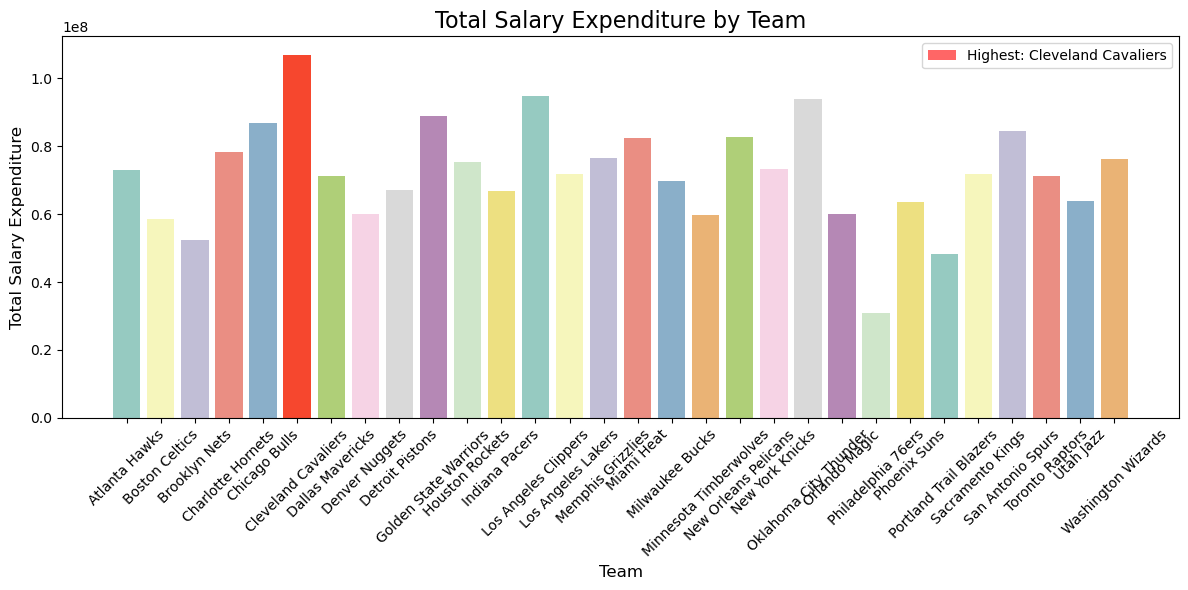

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(x=team_salary_expenditure.index, y=team_salary_expenditure.values, palette='Set3')
plt.title('Total Salary Expenditure by Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Total Salary Expenditure', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Highlight the team with the highest salary expenditure
plt.bar(highest_salary_team, highest_salary_team_value, color='red', label=f'Highest: {highest_salary_team}', alpha=0.6)

plt.legend()
plt.tight_layout()
plt.show()
